# **1. Loading Pre-Trained BERT**

In [ ]:
!pip install transformers

In [2]:
import torch
from transformers import BertTokenizer, BertModel

import logging

import matplotlib.pyplot as plt
%matplotlib inline

#Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# **2. Input Formatting**


1. A special token, [SEP], to mark the end of a sentence, or the separation between two sentences
2. A special token, [CLS], at the beginning of our text. This token is used for classification tasks, but BERT expects it no matter what your application is.
3. Tokens that conform with the fixed vocabulary used in BERT
4. The Token IDs for the tokens, from BERT’s tokenizer
5. Mask IDs to indicate which elements in the sequence are tokens and which are padding elements
6. Segment IDs used to distinguish different sentences
7. Positional Embeddings used to show token position within the sequence

# **Tokenization**

In [4]:
text = "Here is the sentence I want embeddings for. "
marked_text = "[CLS] " + text + " [SEP]"

#tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

#print out the tokens.
print(tokenized_text)

['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


In [5]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [7]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " \
       "fishing on the Mississippi river bank."

# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
  print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
after         2,044
stealing     11,065
money         2,769
from          2,013
the           1,996
bank          2,924
vault        11,632
,             1,010
the           1,996
bank          2,924
robber       27,307
was           2,001
seen          2,464
fishing       5,645
on            2,006
the           1,996
mississippi   5,900
river         2,314
bank          2,924
.             1,012
[SEP]           102


# **2.3. Segment ID**

BERT is trained on and expects sentence pairs, using 1s and 0s to distinguish between the two sentences

In [8]:
# Mark each of the 22 tokens as belonging to sentence "1".
segments_ids = [1] * len(tokenized_text)

print(segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# **3. Extracting Embeddings**

**3.1. Running BERT on our text**

In [10]:
# Convert inputs to Pytorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [12]:
segments_tensors

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [13]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()



BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [14]:
with torch.no_grad():
  outputs = model(tokens_tensor, segments_tensors)
  hidden_states = outputs[2]

# **3.2. Understanding the Output**

**hidden_states** , this object has four dimensions, in the following order:

1. The layer number (13 layers)
2. The batch number (1 sentence)
3. The word / token number (22 tokens in our sentence)
4. The hidden unit / feature number (768 features)


In [15]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))


Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 22
Number of hidden units: 768


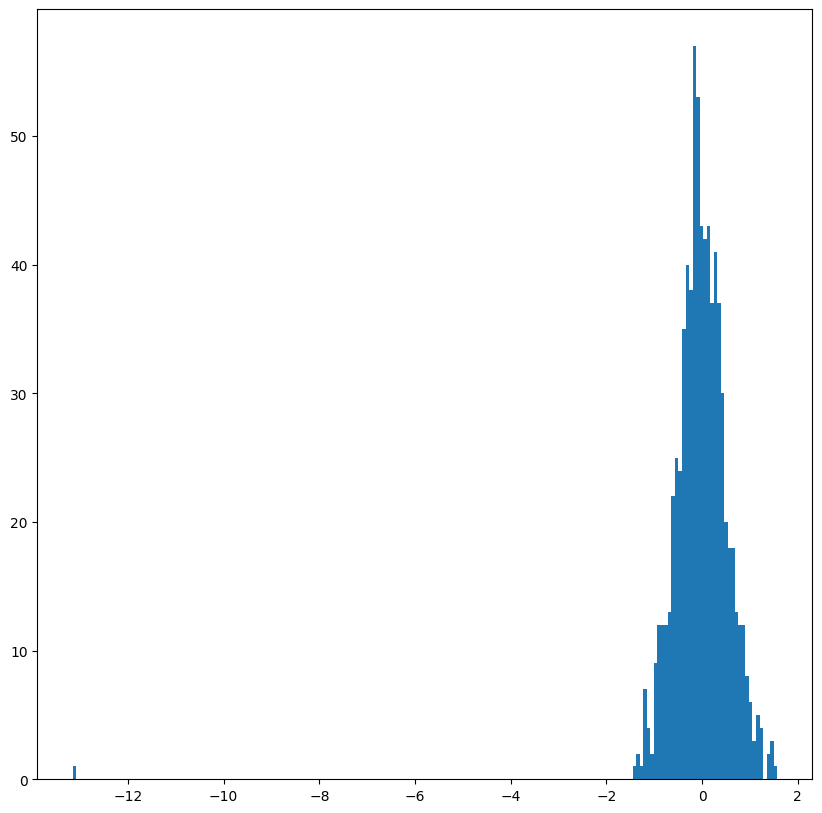

In [16]:
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize = (10,10))
plt.hist(vec, bins=200)
plt.show()

In [30]:
vec

tensor([-3.8239e-02, -4.3142e-01, -9.4003e-01, -3.7796e-01,  4.6533e-01,
        -2.1359e-02,  4.2451e-01,  2.9385e-01, -6.6050e-02,  1.3739e-01,
         1.0077e-01,  1.9676e-02,  2.8689e-01, -4.1811e-01, -5.8627e-01,
         9.7334e-01,  2.9450e-01, -1.0523e-01,  3.8430e-01,  9.1205e-01,
         1.4007e-01, -5.8490e-02, -4.0010e-01, -4.4090e-01, -1.3953e-01,
         3.4891e-01, -9.9432e-01,  3.1800e-01, -2.1938e-01, -3.9903e-01,
        -4.3759e-02,  3.4424e-01,  1.6558e-01, -8.3546e-01, -1.0872e-02,
         1.1923e-01, -1.1081e+00,  1.5194e-01,  8.7601e-02,  1.8001e-01,
        -4.3023e-02,  1.4976e-01,  4.3004e-01, -7.4824e-01,  7.1204e-01,
         3.0397e-01,  3.7053e-02,  1.5315e-01,  5.2379e-02, -5.6534e-01,
         3.7624e-01,  5.2176e-01, -5.5514e-01, -9.0717e-01, -3.6776e-01,
         6.7039e-01,  1.0088e+00, -7.3990e-01, -9.0580e-02, -2.3043e-01,
        -1.8558e-01,  3.3589e-01,  6.3556e-01, -7.8175e-01,  1.3978e-02,
        -8.9313e-01, -2.3682e-01,  9.6711e-01,  3.2

**Current dimensions:**

[# layers, # batches, # tokens, # features]

**Desired dimensions:**

[# tokens, # layers, # features]

In [17]:
# `hidden_states` is a Python list.
print('Type of hidden_states: ', type(hidden_states))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', hidden_states[0].size())


Type of hidden_states:  <class 'tuple'>
Tensor shape for each layer:  torch.Size([1, 22, 768])


In [19]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

torch.Size([13, 1, 22, 768])

In [ ]:
token_embeddings

In [21]:
# Remove dimension 1, the "batches"
token_embeddings = torch.squeeze(token_embeddings, dim=1)
token_embeddings.size()

torch.Size([13, 22, 768])

In [22]:
token_embeddings = token_embeddings.permute(1, 0, 2)
token_embeddings.size()

torch.Size([22, 13, 768])

# **3.3. Creating word and sentence vectors from hidden states**

# **Word Vectors**

First, let’s concatenate the last four layers, giving us a single word vector per token. Each vector will have length 4 x 768 = 3,072.

In [23]:
# stores the token vectors, with shape [22x3, 072]
token_vecs_cat = []

# `token_embeddings` is a [22 x 12 x 768] tensor.
for token in token_embeddings:
  # token is a [12x768] tensor
  # concatenate vectors
  # four layers
  # Each layer vector is 768 values, so 'cat_vec' is length 3,072
  cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
  token_vecs_cat.append(cat_vec)

print('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

Shape is: 22 x 3072


As an alternative method, let’s try creating the word vectors by summing together the last four layers.

In [24]:
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)

    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))


Shape is: 22 x 768


# **Sentence Vectors**

In [25]:
# `hidden_states` has shape [13 x 1 x 22 x 768]

# `token_vecs` is a tensor with shape [22 x 768]
token_vecs = hidden_states[-2][0]

# Calculate the average of all 22 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)


In [26]:
print ("Our final sentence embedding vector of shape:", sentence_embedding.size())

Our final sentence embedding vector of shape: torch.Size([768])


# **3.4. Confirming contextually dependent vectors**

In [27]:
for i, token_str in enumerate(tokenized_text):
  print(i, token_str)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 mississippi
18 river
19 bank
20 .
21 [SEP]


In [28]:
print('First 5 vector values for each instance of "bank".')
print('')
print("bank vault   ", str(token_vecs_sum[6][:5]))
print("bank robber  ", str(token_vecs_sum[10][:5]))
print("river bank   ", str(token_vecs_sum[19][:5]))

First 5 vector values for each instance of "bank".

bank vault    tensor([ 3.3596, -2.9805, -1.5421,  0.7065,  2.0031])
bank robber   tensor([ 2.7359, -2.5577, -1.3094,  0.6797,  1.6633])
river bank    tensor([ 1.5266, -0.8895, -0.5152, -0.9298,  2.8334])


In [29]:
from scipy.spatial.distance import cosine

diff_bank = 1 - cosine(token_vecs_sum[10], token_vecs_sum[19])

# Calculate the cosine similarity between the word bank
# in "bank robber" vs "bank vault" (same meaning).
same_bank = 1 - cosine(token_vecs_sum[10], token_vecs_sum[6])

print('Vector similarity for  *similar*  meanings:  %.2f' % same_bank)
print('Vector similarity for *different* meanings:  %.2f' % diff_bank)


Vector similarity for  *similar*  meanings:  0.94
Vector similarity for *different* meanings:  0.69
